# Hardware Testing Processes :

- The instrumentation course covers the base topics of industrial instrumentation: sensors and how they work, A-D and D-A converters, instruments useful for taking measures, communication buses used in instrumentation, calibration, …
- The instrumentation labs make use of the python and VISA protocol. It allows the students to learn a software widely used in the industry in order to design automated and autonomous instrumentation systems.

---
## Setup:

1. Create a new -venv :

```>>> python -m venv HTP_venv ```

requirements.txt :
```
numpy
matplotlib

ipykernel
jupyter
```


2. Activate the venv and install dependencies :
```
>>> .\HTP_venv\Scripts\Activate.ps1
>>> pip install -r requirements.txt
```

3. Register our venv as a Jupyter kernel:
```
>>> python -m ipykernel install --user --name=HTP_venv --display-name="Python (HTP_venv)"
>>> jupyter kernelspec list
```
(should show) : htp_venv         C:\Users\user\AppData\Roaming\jupyter\kernels\htp_venv


### Drivers (Windows 10):

DG1022 : 
- Goto https://www.rigolna.com/download/ 
- Filter by DG1000 in the search bar.
- then Download > UltraSigma Instrument Connectivity Driver

<!-- DS1104 :
- a
- b
- c -->


<!-- --- -->

---
## Session 1- the function generator- Rigol DG1022

#### Class definition (unimplemented)

In [ ]:
# import pyvisa
# import time

# TODO: abstract into a class


# class DGt022:
#     def __init__(self, resource=None, manager=None, verbose=True, auto_connect=True, timeout_ms=10000, sleep=0.1):    
#         # self.device = device
#         # self.f = os.open(device, os.O_RDWR)
#         self.verbose = bool(verbose)
#         self.rm = manager
#         self.dg = resource
#         self.timeout_ms = float(timeout_ms)
#         self.sleep = float(sleep)
#         if auto_connect and (self.dg is None):
#             self.connect()


#     def connect(self):
#         try:
#             # Create resource manager
#             if self.rm is None:
#                 self.rm = pyvisa.ResourceManager()
#             resources = self.rm.list_resources()
#             if self.verbose: print("PyVisa Resources:", resources)

#             # Find DG1022 automatically
#             dg1022_id = None
#             for r in resources:
#                 if "DG1" in r or "0x1AB1" in r:
#                     dg1022_id = r
#                     break
#             if not dg1022_id:
#                 raise RuntimeError("DG1022 not found in resources.")
#             if self.verbose:print("Connecting to", dg1022_id)

#             # Connect to device
#             self.dg = self.rm.open_resource(dg1022_id)
            
#             # Configure communication settings
#             self.dg.timeout = self.timeout_ms
#             self.dg.read_termination = '\n'
#             self.dg.write_termination = '\n'
#             # try:
#             self.dg.chunk_size = 20480
#             # except Exception:
#             #     pass


#             # Test communication: quick IDN check (non-fatal)
#             try:
#                 self.dg.write('*IDN?')
#                 sleep(self.sleep)
#                 idn = self.dg.read()
#                 if self.verbose:print("DG1022 IDN:", idn)
#             except Exception as e:
#                 print("Warning: IDN read failed:", e)
#             return True



#         except Exception as e:
#             print(f"Connection failed: {e}")
#             if 'rm' in locals():
#                 rm.close()
#             self.dg = None
#             self.rm = None
#             return False

#     def close(self):
#         self.dg.close()
#         self.rm.close()
#         if self.verbose: print("Connections closed.")

#     def toggle_CH1(self, state):
#         if state == "ON":
#             self.dg.write("OUTP ON")
#         else:
#             self.dg.write("OUTP OFF")

#     def toggle_CH2(self, state):
#         if state == "ON":
#             self.dg.write('OUTPut:CH2 ON ')
#         else:
#             self.dg.write('OUTPut:CH2 OFF ')




#     # def frequency(self, freq):
#     #     self.write("FREQ %.3f" % freq)

#     # def sinusoid(self):
#     #     self.write("APPL:SIN")

#     # def voltage(self, vpp):
#     #     self.write("VOLT %.3f" % vpp)

#     # def offset(self, o):
#     #     self.write("VOLT:OFFS %.3f" % o)
    
#     # def pos_voltage(self, vpp):
#     #     self.voltage(vpp)
#     #     self.offset(vpp/2) 

#     # def read(self, length=4000):
#     #     return os.read(self.f, length)

#     # def write(self, cmd):
#     #     os.write(self.f, cmd)
#     #     sleep(0.1)

# ctrl = DG1022()

# ctrl.toggle_CH1("ON")   # TODO:



### 1 - Connect to DG1022

In [63]:
# 1. Find the unique ID of instrument :
# Challenge, make it automatic to connect one function generator and one oscilloscope with the right ID and
    #  variable. 1 bonus point out of 20 will be provided if you can do it before the last session, only to the first one to
    #  achieve it.
    
import pyvisa
import time

def connect_to_dg1022(verbose=False):
    try:
        # Create resource manager
        rm = pyvisa.ResourceManager()
        resources = rm.list_resources()
        if verbose : print(f"PyVisa Resources detected: {resources}")
        
        # Find DG1022 automatically
        dg1022_id = None
        for resource in resources:
            if "DG1" in resource or "0x1AB1" in resource:
                dg1022_id = resource
                break
        
        if not dg1022_id:
            print("DG1022 not found!")
            return None, None
        
        if verbose : print(f"Found DG1022 ID: {dg1022_id}")
        
        # Connect to device
        dg = rm.open_resource(dg1022_id)
        
        # Configure communication settings
        dg.timeout = 10000
        dg.read_termination = '\n'
        dg.write_termination = '\n'
        dg.chunk_size = 20480
        dg.clear()
        
        time.sleep(0.5)
        
        # Test communication
        # dg.write('*IDN?')
        # time.sleep(0.5)
        # idn = dg.read()
        # print(f"DG1022 Connected! Device Info: {idn}")
        
        return rm, dg
        
    except Exception as e:
        print(f"Connection failed: {e}")
        if 'rm' in locals():
            rm.close()
        return None, None

def close_dg1022(rm,dg):
    try:
        dg.close()
        rm.close()
        print("Connections closed.")
    except Exception as e:
        print(f"Error closing connections: {e}")

# ================ EXECUTION ===========================
rm, dg = connect_to_dg1022(True)

if dg:
    print("Device ready for commands!")
    
    #! CLOSE
    close_dg1022(rm, dg)
else:
    print("Failed to connect to DG1022")






PyVisa Resources detected: ('USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR', 'USB0::0x0400::0x09C4::DG1F143800627::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR')
Found DG1022 ID: USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR
Device ready for commands!
Connections closed.


### 2 - Toggle CH1

In [ ]:
def toggle(channel, state, dg):    # TODO: how to pass dg.write through function ?
    if channel == "CH1":
        if state == "ON":
            dg.write("OUTP ON")
        else:
            dg.write("OUTP OFF")
    elif channel == "CH2":
        if state == "ON":
            dg.write('OUTPut:CH2 ON ')
        else:
            dg.write('OUTPut:CH2 OFF ')
    return

PyVisa Resources detected: ('USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR', 'USB0::0x0400::0x09C4::DG1F143800627::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR')
Found DG1022 ID: USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR


16

In [ ]:
# 2. To start create a simple code that will open and close Channel 1 ten times with a delay of one second between 
# the steps (import time to help you). To communicate correctly, it is important to open the resource manager with 
# the ID of your device and create your instrument in the code. To do this step, use the function open_resources(ID) 
# on the variable of your resource manager and store it in a variable that will correspond to your instrument 
# (example : osci = rm.open_resource(ID)).  Do not forget to close the communication  with your instrument and the resource 
# manager after the execution of your code (For all the functions used by the resource manager, you can get more information on 
# this web page https://pyvisa.readthedocs.io/en/latest/api/resources.htm

import time

rm, dg = connect_to_dg1022()
t = 2

try :
    print("Channel 1 and 2 toggle tests....")
    for i in range(2):
        # dg.write('OUTPut:CH2 ON ')
        toggle("CH1", "ON", dg)
        time.sleep(t)
        toggle("CH2", "ON", dg)
        time.sleep(t)

        toggle("CH1", "OFF", dg)
        time.sleep(t)
        toggle("CH2", "OFF", dg)
        time.sleep(t)
    print("Test done ! Channel 2 successfully toggled 10 times.")
    toggle("CH1", "ON", dg)
    time.sleep(t)
    toggle("CH2", "ON", dg)
except Exception as e:
        print(f"Connection failed: {e}")

# Close
close_dg1022(rm, dg)


Channel 1 and 2 toggle tests....
Test done ! Channel 2 successfully toggled 10 times.
Connections closed.


### 3 - Sine Function

In [ ]:
# 3. based on the programming Manual, explore the functionalities in order to create a sine of
#  5V on channel1 and a square of 3volt on channel2.To visualize the generated waves,you
#  can use the oscilloscope and BNC wires in the lab.
import time

#? Source: Example 7 in DG1000 Documentation

rm, dg = connect_to_dg1022()

# Channel 1:
dg.write('VOLT:UNIT VPP')           # Set the amplitude unit of CH1 
time.sleep(0.05)
dg.write('APPL:RAMP 1000, 2.5, 0.5 ')  # Set the frequency, amplitude and offset of sine wave output from CH1 
time.sleep(0.05)

dg.write('PHAS 10 ')                # Set the initial phase of wave output from CH1 
time.sleep(0.05)
toggle("CH1", "ON", dg)


# Channel 2:
dg.write('VOLT:UNIT:CH2 VPP')           # Set the amplitude unit of CH1 
time.sleep(0.05)
dg.write('APPL:SQUare:CH2 1000, 2.5, 0.5 ')  # Set the frequency, amplitude and offset of sine wave output from CH1 
time.sleep(0.05)

dg.write('PHAS:CH2 10 ')                # Set the initial phase of wave output from CH1 
time.sleep(0.05)
toggle("CH2", "ON", dg)



# Close
close_dg1022(rm, dg)

Connections closed.


### Generate All Waveforms:

In [60]:
# Waves : (sin, square, ramp, pulse, noise, dc)
wave = {
    "sin":"SINusoid",
    "square" : "SQUare",
    "ramp" : "RAMP",
    "pulse" : "PULSe",
    "noise" : "NOISe",
    "dc" : "DC"
}
# Waves : (sin, square, ramp, pulse, noise, dc)

def generate_waveform(dg, channel, waveform_type, frequency, amplitude, offset=0, phase=0, duty_cycle=50):
    """Note that writing to CH1 is different from writing to CH2...."""
    args = f"{frequency}, {amplitude}, {offset} "
    
    if channel == "CH1":
        # print(channel)
        toggle("CH1", "ON", dg)
        dg.write('VOLT:UNIT VPP')
        time.sleep(0.05)
        dg.write(f'APPL:{waveform_type} {args}')   # e.g. APPL:RAMP 1000, 2.5, 0.5
        time.sleep(0.05)
        dg.write(f'PHAS {phase} ')
        time.sleep(0.05)

    else:
        # for CH2 use the CH-specific notation...
        toggle("CH2", "ON", dg)
        dg.write(f'VOLT:UNIT:{channel} VPP')
        time.sleep(0.05)
        dg.write(f'APPL:{waveform_type}:{channel} {args}')  # e.g. APPL:SQUare:CH2 1000, 2.5, 0.5
        time.sleep(0.05)
        dg.write(f'PHAS:{channel} {phase} ')
        time.sleep(0.05)



In [62]:

# =========================================
rm, dg = connect_to_dg1022()



# 5V sine on CH1
# generate_waveform(dg, channel="CH1", waveform_type=wave["pulse"], frequency=1000, amplitude=5)

# 3V square on CH2
# generate_waveform(dg, channel="CH2", waveform_type=wave["square"], frequency=1000, amplitude=3)
if True:
    for w in wave:
        generate_waveform(dg, channel="CH1", waveform_type=w, frequency=1000, amplitude=5)
        print(f'CH1 is a : {w}')
        time.sleep(2)

    for w in wave:
        generate_waveform(dg, channel="CH2", waveform_type=w, frequency=1000, amplitude=5)
        print(f'CH2 is a : {w}')
        time.sleep(2)

# Close
close_dg1022(rm, dg)

CH1 is a : sin
CH1 is a : square
CH1 is a : ramp
CH1 is a : pulse
CH1 is a : noise
CH1 is a : dc


KeyboardInterrupt: 

### 4 - Exponential Wave Flattening by capacitor:

In [ ]:
# 4.On a breadboard, use a capacitor to flatten an exponential wave generated by the generator
#  (find the right information in the manual). Watch your signal on the oscilloscope.

rm, dg = connect_to_dg1022()




# Close
close_dg1022(rm, dg)

### 5 - Square Signal:

In [ ]:
#  5. To be complete, create a square signal on channel 1 that has:
#  —a frequency of 1250Hz
#  —an offset of 2.3V
#  —a duty-cycle of 60%
#  —an amplitude changing every 2 seconds from 2.3V to 4.6V

rm, dg = connect_to_dg1022()

freq = 1250
offset = 2.3
duty_cycle = 60
wav=wave["square"]

for i in range(5):
    generate_waveform(dg, channel="CH1", waveform_type=wav, frequency=freq, amplitude=2.3, offset=offset, duty_cycle=duty_cycle)
    time.sleep(2)
    generate_waveform(dg, channel="CH1", waveform_type=wav, frequency=freq, amplitude=4.6, offset=offset, duty_cycle=duty_cycle)
    time.sleep(2)

# Close
close_dg1022(rm, dg)




Connections closed.


### 6 - Record and Save in CSV:

In [ ]:
# . Record all the information of exercise 5 in a CSV file with a timeline and show it with a
#  graph

rm, dg = connect_to_dg1022()


dg.read()




# Close
close_dg1022(rm, dg)

### 7 - (Challenge) Generate song into Speaker:

In [ ]:
# 7. Challenge : Use a song as an arbitrary waveform and make it generated by the generator
#  into the speaker. (ask the speaker to the professors)

rm, dg = connect_to_dg1022()




# Close
close_dg1022(rm, dg)

---
## Session 2- the Oscilloscope-DS1104 :

### 1-Connect :

In [ ]:
import pyvisa
import time

def connect_to_ds1104(verbose=False):
    try:
        # Create resource manager
        rm = pyvisa.ResourceManager()
        resources = rm.list_resources()
        if verbose : print(f"PyVisa Resources detected: {resources}")
        
        # Find DS1104 automatically
        ds1104_id = None
        for resource in resources:
            if "DS" in resource or "0x1AB1" in resource:
                ds1104_id = resource
                break
        
        if not ds1104_id:
            print("DS1104 not found!")
            return None, None
        
        if verbose : print(f"Found DS1104_id ID: {ds1104_id}")
        
        # Connect to device
        ds = rm.open_resource(ds1104_id)
        if verbose : print("Connected !")
        
        # Configure communication settings
        # ds.timeout = 10000
        # ds.read_termination = '\n'
        # ds.write_termination = '\n'
        # ds.chunk_size = 20480
        # ds.clear()
        
        time.sleep(2)    #! ----- IMPORTANT DELAY -----
        
        # Test communication
        # ds.write('*IDN?')
        # sleep(0.5)
        # idn = ds.read()
        # print(f"DS1104 Connected! Device Info: {idn}")
        
        return rm, ds
        
    except Exception as e:
        print(f"Connection failed: {e}")
        if 'rm' in locals():
            rm.close()
        return None, None

def close_ds1104(rm,ds):
    try:
        ds.close()
        rm.close()
        print("Connections closed.")
    except Exception as e:
        print(f"Error closing connections: {e}")

# ================ EXECUTION ===========================
rm, ds = connect_to_ds1104(True)


t = 0.5  # delay time

if ds :
    # To select a single channel (1 or 2) permanently you can use this line
    # it allows you to not write CHAN2 at every call
    ds.write(':MEASure:SOURce CHANnel2')
    time.sleep(t)
    data = []
    data.append(ds.query(':MEAS:Item? VPP'))
    time.sleep(t)
    temp = ds.query(':MEAS:Item? VPP')
    time.sleep(t)
    data.append(temp)
    time.sleep(t)
    data.append(ds.query(':MEAS:Item? VAVG'))
    time.sleep(t)
    data.append(ds.query(':MEAS:Item? PER'))
    time.sleep(t)
    data.append(ds.query(':MEAS:SOUR?'))
    time.sleep(t)
    data.append(ds.query(':CHAN1:SCAL?'))
    time.sleep(t)
    data.append(ds.query(':FUNC:WREC:FEND?'))
    time.sleep(t)
    ds.write(':MATH:FFT:SOUR CHAN1')
    time.sleep(t)
    ds.write(':MATH:OPER FFT')
    time.sleep(t)
    ds.write(':MATH:DISP ON')
    time.sleep(t)
    res = ds.query(':LAN:VISA?')
    time.sleep(t)
    data.append(res)

    # Warning to Measure 'MAth' should be off
    # either it might not work, try it yourself! do you get data 8?
    ds.write(':MATH:OPER FFT')
    time.sleep(t)
    ds.write(':MATH:DISP OFF')
    time.sleep(t)
    #measure the frequency of the signal
    ds.write(':MEAS:COUN:SOUR CHAN1')
    data.append(ds.query(':MEAS:COUN:VAL?'))
    print(f"Data : {data}")
    
else:
    print("Failed to connect to DS1104")


close_ds1104(rm, ds)




PyVisa Resources detected: ('USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR', 'USB0::0x0400::0x09C4::DG1F143800627::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR')
Found DS1104_id ID: USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR
Connected !
Data : ['9.9E37\n', '9.9E37\n', '9.9E37\n', '9.9E37\n', 'CHAN2\n', '1.000000e+00\n', '5000\n', 'TCPIP::73.4.17.172::INSTR\n', '1.2480121e+03\n']
Connections closed.


### 2-Oscilloscope:

1. Create a program that can interface the oscilloscope and plot VRMS as a function of 
- (a) Use numpy
- (b) use Use MatplotLib (Some people may encounter an error of "non interactive plot", in this case, you can install pyQT5 (or higher)  with the line pip install pyqt5)



In [54]:
import numpy as np
import matplotlib.pyplot as plt

def measure_vrms(ds, channel='CHAN1'):
    """Get a single VRMS measurement from the scope."""
    ds.write(f':MEAS:SOUR {channel}')
    time.sleep(0.05)
    result = ds.query(':MEAS:ITEM? VRMS')
    return float(result.strip())

def plot_vrms(times, values, title="VRMS vs Time", show_average=True):
    """Plot VRMS data with optional average line."""
    plt.figure(figsize=(10, 5))
    plt.plot(times, values, 'o-', label='VRMS samples')
    
    if show_average:
        avg = np.nanmean(values)
        plt.axhline(avg, color='r', linestyle='--', label=f'Average: {avg:.6f} V')
    
    plt.xlabel('Time (s)')
    plt.ylabel('VRMS (V)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
# Connect Oscilloscope and Function Generator
rm, ds = connect_to_ds1104(True)
rm, dg = connect_to_dg1022()

if ds and dg:
    # Generate DC with Ampl=5V on CH1
        # Waves : (sin, square, ramp, pulse, noise, dc)
    generate_waveform(dg, channel="CH1", waveform_type=wave["dc"], frequency=1000, amplitude=5)
    time.sleep(1)

    # Measure VRMS
    print(measure_vrms(ds, 'CHAN1'))
    time.sleep(1)

    # Plot
    # plot_vrms()


# Close
close_ds1104(rm, ds)
close_dg1022(rm, dg)



PyVisa Resources detected: ('USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR', 'USB0::0x0400::0x09C4::DG1F143800627::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR')
Found DS1104_id ID: USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR
Connected !
0.8
Connections closed.
Connections closed.


In [55]:
# 2. To measure an accurate value of the VRMS take several values of it (10 then 100), plot all
#  the value and the average of its. Don’t forget to leave some time to the data to be stored
#  (500ms per scan).

def collect_samples(ds, n_samples, wait_ms=500, channel='CHAN1'):
    """Collect n samples with specified wait time. Returns (times, values)."""
    times = []
    values = []
    start = time.time()
    print_val = []

    
    for i in range(n_samples):
        try:
            val = measure_vrms(ds, channel)
            values.append(val)
            times.append(time.time() - start)
            print_val.append(f"{val:.3f} V")
            time.sleep(wait_ms / 1000.0)
        except Exception as e:
            print(f"Sample {i+1} failed: {e}")
            values.append(np.nan)
            times.append(time.time() - start)
    print(print_val)
    return np.array(times), np.array(values)


Connections closed.
PyVisa Resources detected: ('USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR', 'USB0::0x0400::0x09C4::DG1F143800627::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR')
Found DS1104_id ID: USB0::0x1AB1::0x04CE::DS1ZC212301115::INSTR
Connected !
['0.093 V', '0.092 V', '0.093 V', '0.091 V', '0.092 V', '0.092 V', '0.093 V', '0.092 V', '0.093 V', '0.092 V']


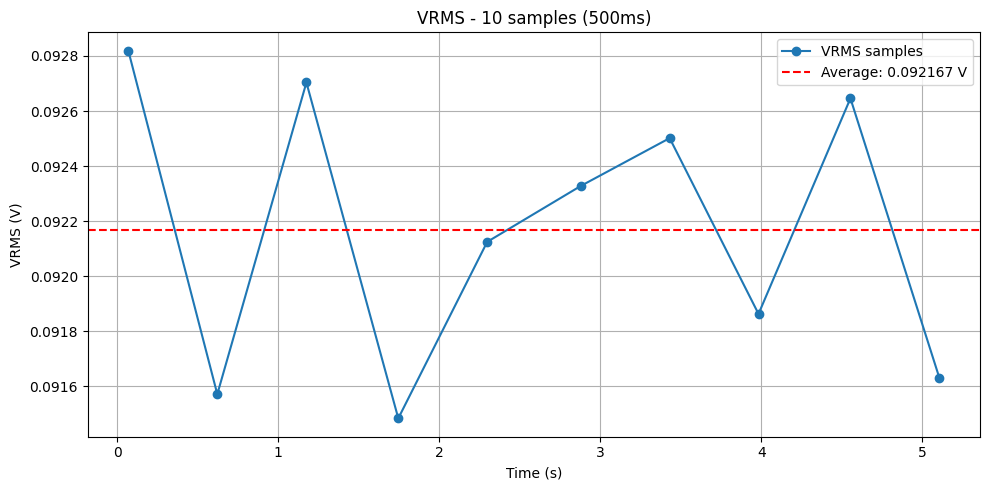

Connections closed.


In [ ]:
# Generate DC with Ampl=5V on CH1
rm, dg = connect_to_dg1022()
if dg:
    generate_waveform(dg, channel="CH1", waveform_type=wave["square"], frequency=1000, amplitude=5)  # Waves : (sin, square, ramp, pulse, noise, dc)
    time.sleep(1)
    close_dg1022(rm, dg)


# time.sleep(2)

# Collect samples and plot
# rm, ds = connect_to_ds1104(True)
# if ds:
#     t10, v10 = collect_samples(ds, n_samples=10, wait_ms=500, channel='CHAN1')
#     plot_vrms(t10, v10, title="VRMS - 10 samples (500ms)", show_average=True)
#     # Close
#     close_ds1104(rm, ds)






In [ ]:
# 3. Let’s start reducing the value of waiting. Compute the minimum waiting time and
#  with it the sampling rate of VRMS on the oscilloscope.

def find_min_delay(ds, test_delays=[500, 250, 100, 50, 25, 10, 5, 1], n_test=10, channel='CHAN1'):
    """Find minimum reliable delay between measurements. Returns (min_delay_ms, max_rate_hz)."""
    for delay_ms in test_delays:
        print(f"\nTesting {delay_ms}ms delay...")
        t_start = time.time()
        success = 0
        
        for i in range(n_test):
            try:
                measure_vrms(ds, channel)
                success += 1
                time.sleep(delay_ms / 1000.0)
            except Exception as e:
                print(f"  Failed at sample {i+1}: {e}")
                break
        
        elapsed = time.time() - t_start
        
        if success == n_test:
            rate = success / elapsed
            print(f"  ✓ SUCCESS: {success}/{n_test} in {elapsed:.3f}s → {rate:.2f} Hz")
            return delay_ms, rate
        else:
            print(f"  ✗ FAILED: {success}/{n_test} samples")
    
    return None, None


### 3-Full Wave Measurement:

In [ ]:
import pyvisa

### 4-Phase Measurement:

In [ ]:
###

### 5-Automated Code:

In [ ]:
#

---

---
## Session 3 : Arduino and Power Supply

### 1-Arduino:

In [ ]:
#

### 2-All together:

In [ ]:
#

### x-Challenge:

In [ ]:
#

### x-ChallengeBis: PowerSupply

In [ ]:
#

### 3-All together Bis:

In [ ]:
#